In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv(r"C:\Users\User\Desktop\projects\Medecine Project\datasets\diabetes.csv")

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [201]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [202]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [203]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [204]:
df.sample(10, random_state=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
103,1,81,72,18,40,26.6,0.283,24,0
338,9,152,78,34,171,34.2,0.893,33,1
588,3,176,86,27,156,33.3,1.154,52,1
395,2,127,58,24,275,27.7,1.600,25,0
204,6,103,72,32,190,37.7,0.324,55,0


In [205]:
df[(df.Insulin > 200 )].Outcome.value_counts()

Outcome
1    46
0    39
Name: count, dtype: int64

In [206]:
df.groupby('Pregnancies').Outcome.mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [207]:
df[df.Age > 40].Outcome.value_counts()

Outcome
1    102
0     92
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='Age'>

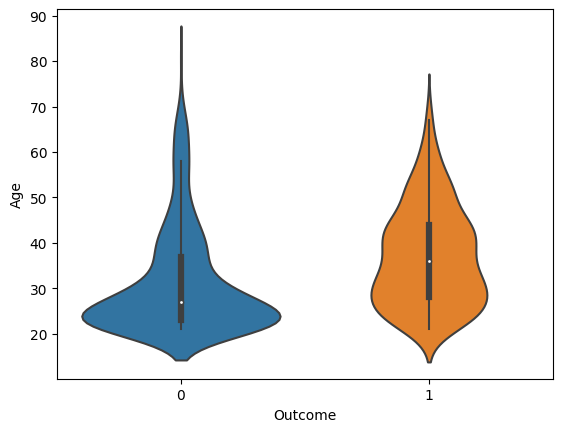

In [208]:
sns.violinplot(x='Outcome', y='Age', data =df)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

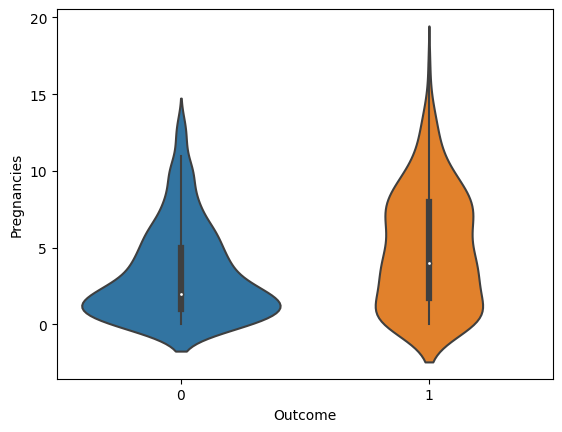

In [209]:
sns.violinplot(x='Outcome', y='Pregnancies', data =df)

<Axes: xlabel='Pregnancies', ylabel='count'>

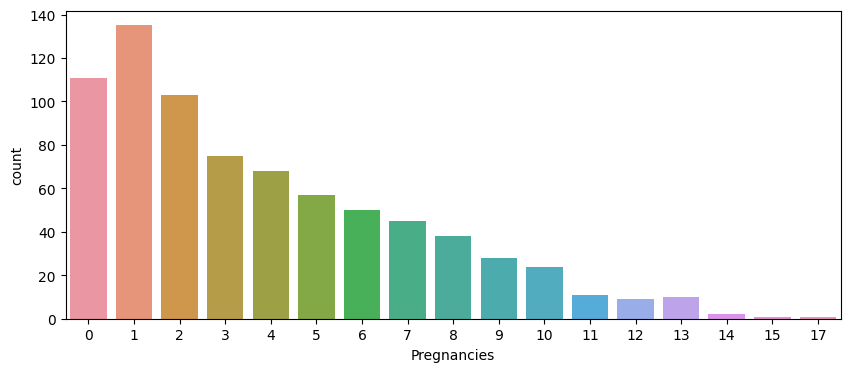

In [210]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x = 'Pregnancies')

<Axes: xlabel='Pregnancies', ylabel='count'>

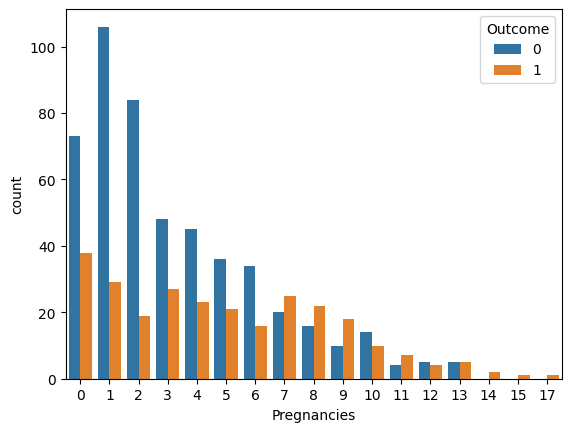

In [211]:
sns.countplot(data=df, x = 'Pregnancies', hue= 'Outcome')

<Axes: xlabel='Age', ylabel='count'>

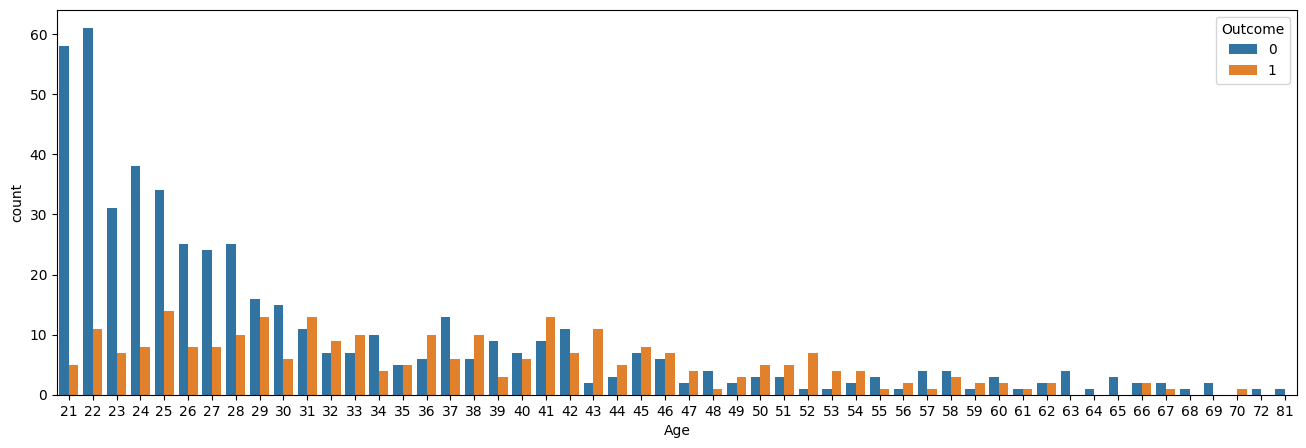

In [212]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x = 'Age', hue= 'Outcome')

<Axes: xlabel='Glucose', ylabel='count'>

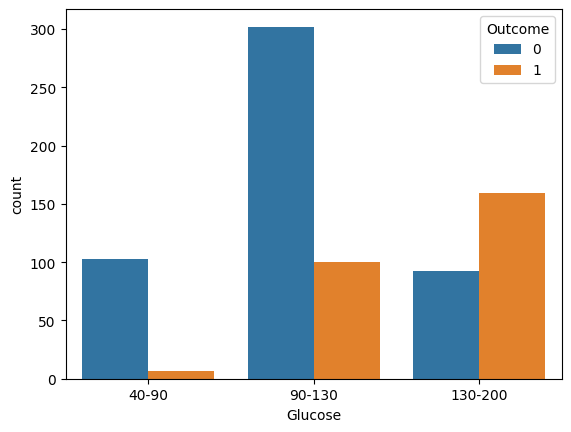

In [213]:
glucose_bins=pd.cut(df["Glucose"],bins=[40,90,130,200],labels=["40-90","90-130","130-200"])
sns.countplot(x = glucose_bins,hue=df["Outcome"])


<Axes: >

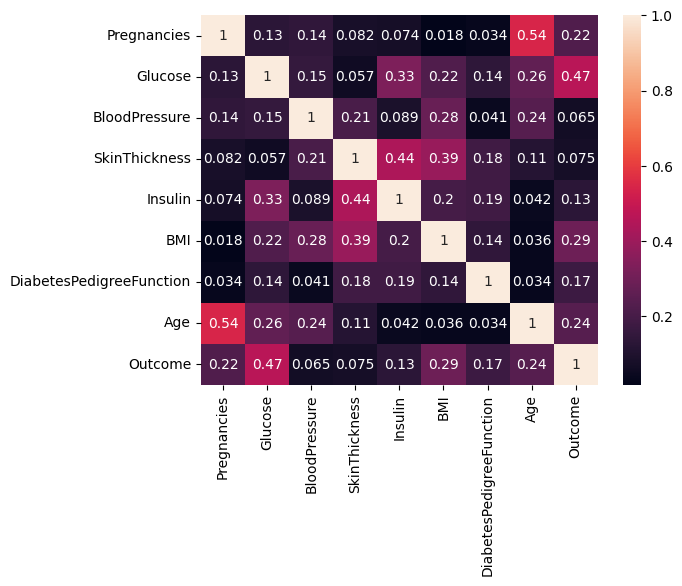

In [214]:
sns.heatmap(df.corr().abs(), annot=True)

In [215]:
#df['Insulin_Glucose'] = df['Insulin'] + (df['Glucose'])**2


In [216]:
# df = df.drop('BloodPressure', axis=1)
# df = df.drop('SkinThickness', axis = 1)

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [218]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
model = LogisticRegression()

model.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7467532467532467


In [222]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model_2 = DecisionTreeClassifier()

# Train the model
model_2.fit(X_train, Y_train)

# Make predictions
y_pred_2 = model_2.predict(X_test)

# Evaluate the model's accuracy
accuracy_2 = accuracy_score(Y_test, y_pred_2)
print("Decision Tree Accuracy:", accuracy_2)

Decision Tree Accuracy: 0.7532467532467533


In [223]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model_3 = RandomForestClassifier()

# Train the model
model_3.fit(X_train, Y_train)

# Make predictions
y_pred_3 = model_3.predict(X_test)

# Evaluate the model's accuracy
accuracy_3 = accuracy_score(Y_test, y_pred_3)
print("Random Forest Accuracy:", accuracy_3)


Random Forest Accuracy: 0.7272727272727273


In [224]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model_4 = KNeighborsClassifier()

# Train the model
model_4.fit(X_train, Y_train)

# Make predictions
y_pred_4 = model_4.predict(X_test)

# Evaluate the model's accuracy
accuracy_4 = accuracy_score(Y_test, y_pred_4)
print("KNN Accuracy:", accuracy_4)


KNN Accuracy: 0.6623376623376623


In [225]:
from sklearn import svm

model_5 = svm.SVC(kernel='linear')

model_5.fit(X_train, Y_train)

y_pred_5 = model_5.predict(X_test)

accuracy_5 = accuracy_score(Y_test, y_pred_5)

print("SVM accuracy: ", accuracy_5)

SVM accuracy:  0.7532467532467533


In [226]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

